This project demonstrates how to perform Exploratory Data Analysis (EDA) in Python and apply Logistic Regression on a real-world dataset. It highlights the importance of understanding, cleaning, and exploring data before modeling, showing how proper EDA directly impacts the accuracy and reliability of machine learning results.

## Project Goal

The goal of this project is to predict passenger survival on the Titanic using machine learning.

This is a binary classification problem, where the target variable has two possible outcomes:

- Survived
- Not Survived

## The full ML pipeline

- Load data
  
- Perform EDA

- Clean data

- Engineer features

- Select features

- Apply Logistic Regression

- Predict survival

### Why Logistic Regression?

Logistic Regression is well-suited for binary classification problems because it predicts the probability of an outcome that falls into one of two classes.

In this project, it is used to model outcomes such as:
- Yes / No
- 0 / 1
- Survived / Deceased

Logistic Regression provides a simple, interpretable baseline model for understanding how different features influence survival probability.


## Installing and Importing the Necessary Libraries

In [1]:
%conda install pandas numpy seaborn matplotlib

mambajs 0.19.13

Specs: xeus-python, numpy, matplotlib, pillow, ipywidgets>=8.1.6, ipyleaflet, scipy, pandas, seaborn
Channels: emscripten-forge, conda-forge

Solving environment...
Solving took 1.381 seconds
  Name                          Version                       Build                         Channel                       
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
+ pandas                        2.3.3                         np22py313h9d9dc1e_0           emscripten-forge              
+ patsy                         1.0.2                         py313h1804a44_0               emscripten-forge              
+ python-tzdata                 2025.3                        pyhd8ed1ab_0                  conda-forge                   
+ seaborn                       0.13.2                        hd8ed1ab_3                    conda-forge                   
+ seaborn-base                  0.13.2                 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

The dataset used in this project is the **Titanic dataset**, sourced from **Kaggle**.

In [3]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### The First Step: Missing Values
- Determine how many Null values exist in the data set (how many missing value)
- It would be more easier to get help from visualisation to see how many null values exist using heatmap in seaborn. (better than .isnull() )
- Heatmaps help us see where missing values exist in the dataset by visualizing conditions such as train.isnull().


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

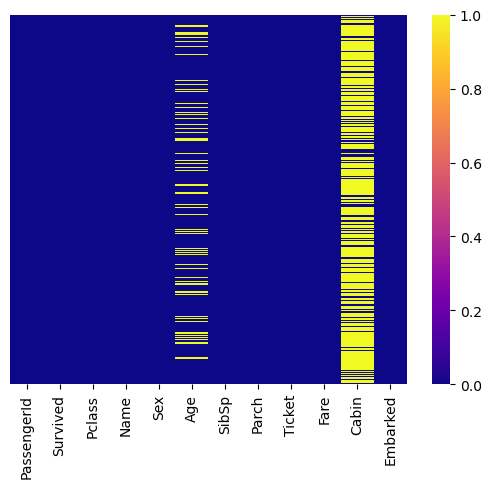

In [5]:
sns.heatmap(train.isnull(), yticklabels = False, cbar=True, cmap='plasma')

The dataset contains missing values in the Age, Cabin, and Embarked columns.
The Age column has 177 missing values, Cabin has a large number of missing values (687), and Embarked has only 2 missing values.
These missing values will need to be handled before model training

- About 20% of the **Age** values are missing, which is manageable and can be handled through imputation.

- However, the **Cabin** feature has too many missing values to be useful in its current form. We will likely remove it or replace it with a binary feature like **“Cabin Known”**.

### Next, move on to additional data visualizations. 

#### Figure 1. First, we plot the distribution of the Survived variable to understand the target variable before building a model.
   
- This helps us see how the classes are distributed and whether the dataset is balanced or imbalanced.

- Knowing this is important because:

    - It affects model choice and evaluation

    - Class imbalance can influence model performance

    - It provides context for interpreting results later

- This plot serves as a baseline overview of survival outcomes in the dataset.

- We will use .countplot() based on survive column. We will see how many people survive and how many people not survive.

<Axes: xlabel='Survived', ylabel='count'>

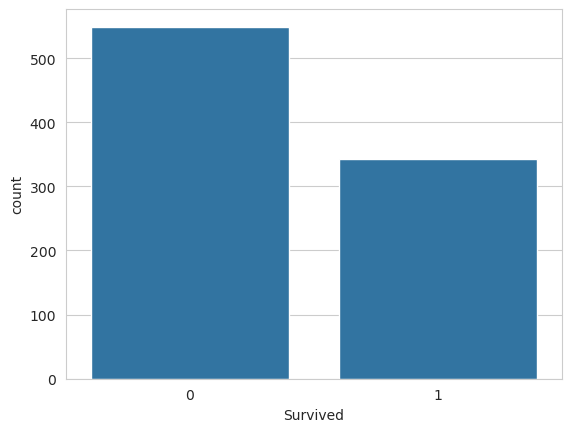

In [6]:
sns.set_style('whitegrid')
sns.countplot(data= train, x='Survived')

- 'hue' is used to split data into groups using different colors.
- It lets to compare categories in the same plot.

<Axes: xlabel='Survived', ylabel='count'>

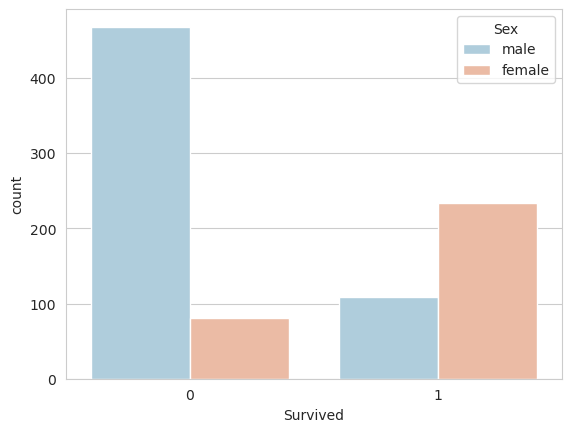

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette = 'RdBu_r')

#### Figure 2. That would be great if we examine how passenger class (Pclass) affects survival outcomes. 
- Since socio-economic status may influence access to lifeboats and safety measures, visualizing survival by class helps us understand its impact on survival probability.

<Axes: xlabel='Survived', ylabel='count'>

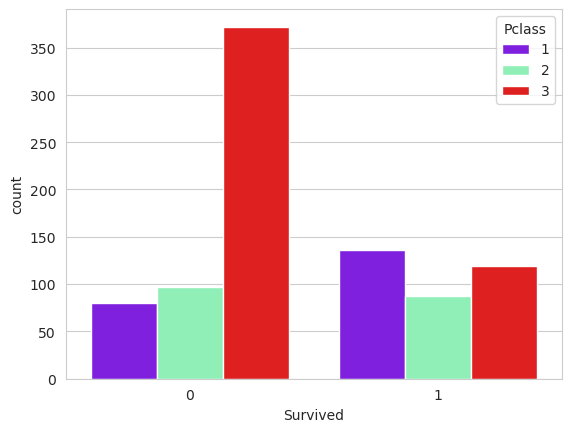

In [8]:
sns.set_style('whitegrid')
sns.countplot(data=train, x = 'Survived', hue = 'Pclass', palette = 'rainbow')

#### Figure 3. Now we are going to see the distribution of age. To see what is the average of the people:

- We plot the distribution of Age to understand:
    - **Check Distribution:** how passenger ages are spread across the dataset. This helps us identify the overall age pattern.
    - **Decide how to fill missing values:** To decide how to handle missing values in the Age column.
    - **Detect skewness**
    - **Outliers**
- Understanding the age distribution is especially important because Age is a key factor that may influence survival, and it guides decisions such as choosing an appropriate imputation strategy (e.g., mean or median).
- First I drop the null value using .dropna(). It is important because plotting functions can break or mislead with NaNs
- This plot shows the distribution of passengers’ ages on the Titanic, using only bars (a histogram).

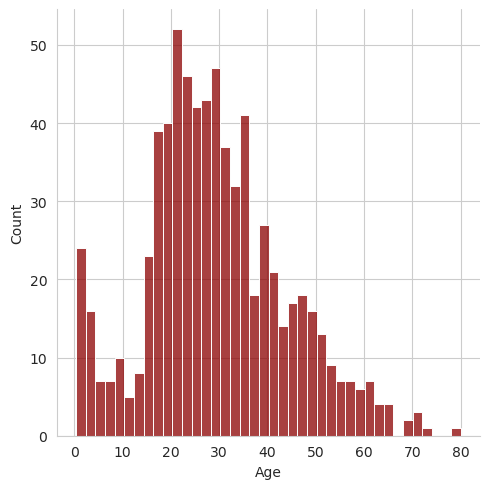

In [9]:
sns.displot(train['Age'].dropna(), kde = False, color = 'darkred', bins = 40)

- Insights:
  
    - Most passengers are between 20–40 years old
    - Fewer children and elderly passengers
    - Age distribution is right-skewed (long tail to the right)

We can also visualize the Age distribution using **Pandas’ built-in plotting functionality** which is **.hist()**, rather than Seaborn that uses Matplotlib internally. This provides an alternative way to examine the distribution of passenger ages.

<Axes: >

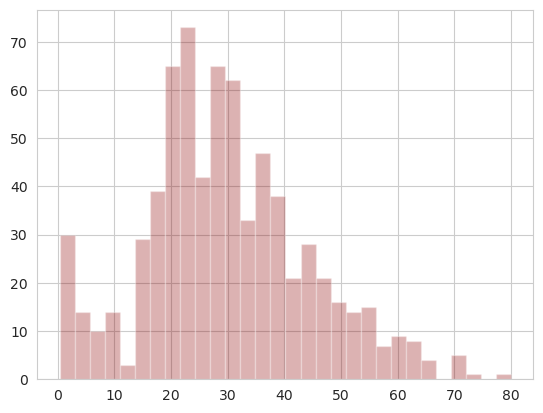

In [10]:
train['Age'].hist(bins=30, color = 'darkred', alpha = 0.3)

- bins --> Divides age values into 30 intervals.
    - More bins → more detail
    - Fewer bins → smoother view

- alpha --> Transparency level
    - Range: 0 (fully transparent) → 1 (solid)
    - Useful when overlaying multiple plots

- Insights:
    
    - Most passengers are young adults (20–40)
    - Fewer very young and elderly passengers
    - Distribution is **right-skewed**
    - Possible **outliers** at high ages (70–80)

#### Figure 4: We plot the distribution of SibSp (number of siblings and spouses aboard) to understand the family structure of passengers on the Titanic.

- This helps us see how many passengers traveled alone versus with family members.

- Understanding this feature is important because traveling with family may have influenced survival chances, and

- it also helps identify whether the variable is skewed or dominated by certain values, which is useful for feature engineering and modeling decisions.

    0 → passenger traveled alone
    1 → 1 sibling or spouse
    2+ → larger families

- A countplot shows how many observations fall into each category/value.

<Axes: xlabel='SibSp', ylabel='count'>

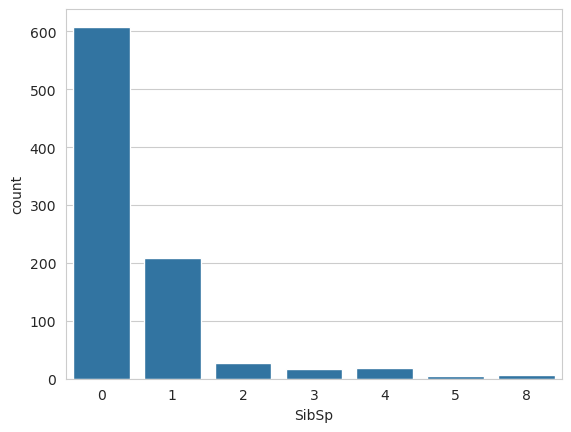

In [11]:
sns.countplot(x = 'SibSp', data =  train)

- insights:
  
    1. Most passengers traveled alone
       - SibSp = 0 has the highest bar
       - Majority of passengers had no siblings/spouses

    2. Small families are common
        - SibSp = 1 is the second most common
          
    3. Very few passengers had large families


- Strong class imbalance
    - Values like 5 or 8 appear very rarely
    - This is important for feature engineering.
    - Occurs when one class has significantly more samples than the other class(es).
    - The majority class can dominate the dataset.
    - Models may become biased toward predicting the majority class.
    - High accuracy can be misleading in imbalanced datasets.
    - Metrics such as precision, recall, and F1-score are more reliable than accuracy.
    - In the Titanic dataset, non-survivors greatly outnumber survivors, creating a class imbalance.

<Axes: xlabel='SibSp', ylabel='count'>

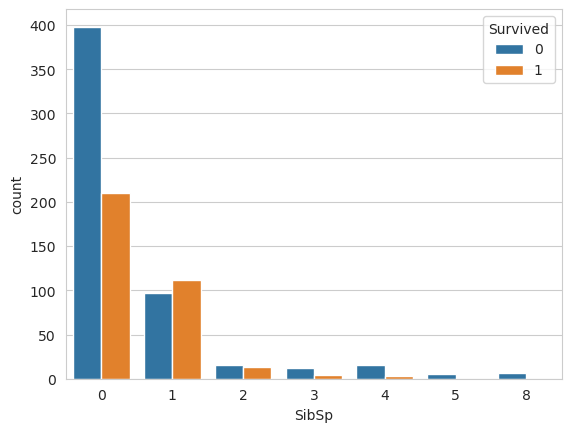

In [12]:
sns.countplot(x = 'SibSp' , hue = 'Survived', data = train)

#### Figure 5: We plot the distribution of Fare to understand how ticket prices are spread across passengers.
- This helps us identify skewness, outliers, and extreme values, since fare prices can vary widely depending on passenger class and cabin type.

- Understanding the fare distribution is important because Fare is a proxy for socio-economic status, which may strongly influence survival.
- This plot also helps determine whether transformations (such as a log transformation) or scaling may be needed before modeling.

##### Option A. Plotting Histogram using Seaborn

<Axes: xlabel='Fare', ylabel='Count'>

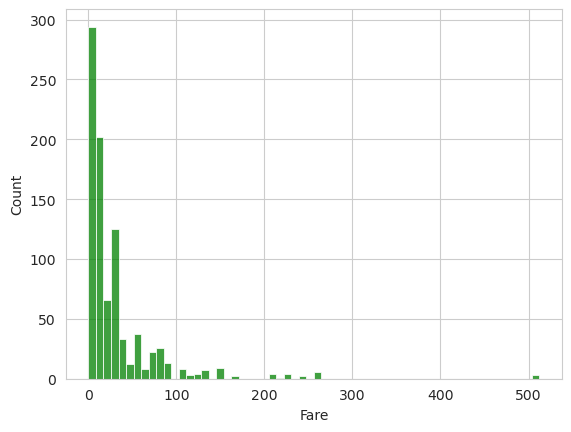

In [13]:
sns.histplot(x = 'Fare', data = train, color = 'Green')

##### Option B. Plotting Histogram using Pandas

<Axes: >

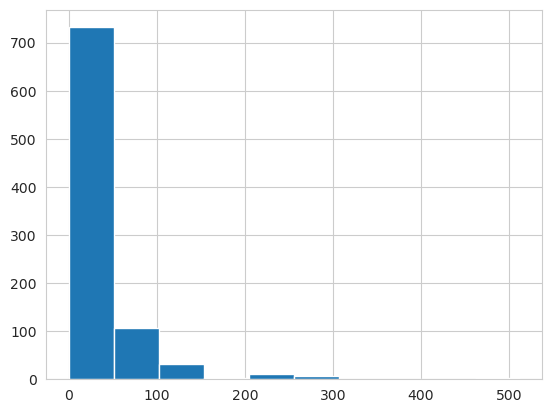

In [14]:
train['Fare'].hist()

##### Attention: 
Both Pandas and Seaborn can be used to plot histograms, but they serve different purposes. Pandas provides a quick and simple way to visualize data, while Seaborn offers more flexibility, better styling, and additional statistical features. As a result, Seaborn is generally more suitable for exploratory data analysis (EDA).

##### Option C: Cufflinks

- A library used to make interactive plots in Python.
- **Cufflinks connects Pandas with Plotly**, so you can create interactive charts directly from DataFrames.



- Matplotlib / Seaborn → static plots


- Cufflinks (Plotly) → interactive plots (zoom, hover, pan)


## Data Cleaning

### Handeling Missing Values

#### A. Handeling missing valuse of the Age column using imputation
- Our EDA revealed missing data in the Age and Cabin features.

- The next step is data cleaning, where we handle missing values to ensure the dataset is ready for machine learning.

- Before handling the missing values in the Age column, I explored the data to see whether Age is related to Passenger Class (Pclass). The analysis suggests that age distributions differ across classes, so using a single overall average age may not be the best approach.

- Instead of filling missing Age with one global mean, we estimate Age based on passenger class (Pclass)


- To handle this more accurately, I will compute the average (or typical) age within each Pclass group. To visualize and compare the age distributions across the three passenger classes (1st, 2nd, and 3rd class), I use a boxplot, since Pclass has three categories in this dataset.

    - Age distribution is different for each class

    - 1st class passengers tend to be older

    - 3rd class passengers tend to be younger


<Axes: ylabel='Age'>

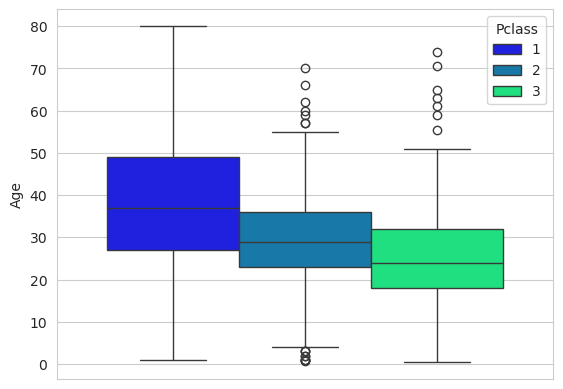

In [15]:
sns.boxplot(hue = 'Pclass', y = 'Age', data = train, palette = 'winter')

- insights:
    - X-axis → Passenger class (1, 2, 3)
    - Y-axis → Age
    - Each box → Age distribution for that class
    - Each box shows:
        - Middle line → Median age
        - Box → 25th to 75th percentile (IQR)
        - Whiskers → Normal age range
        - Dots → Outliers (very old passengers)

- insights from the plot:
    - Pclass 1 → Highest median age (older passengers)
    - Pclass 2 → Middle-aged passengers
    - Pclass 3 → Youngest passengers overall

##### How we will handle missing values
- So it makes sense to fill missing Age like this:
    - If passenger is in Pclass 1, use average Age of class 1
    - If in Pclass 2, use average Age of class 2
    - If in Pclass 3, use average Age of class 3

##### This is a GOOD data cleaning strategy since:

- Keeps more data
- Preserves class-specific patterns
- Improves model performance
- More realistic than global mean


##### Summary: 

Instead of dropping rows with missing Age, we used **class-wise imputation**. A boxplot of Age vs Pclass shows distinct age distributions, so filling missing values using the average age per passenger class is more accurate.

##### Step 1 for class-wise imputation: Compute average Age per Pclass

In [16]:
age_by_class = train.groupby('Pclass')['Age'].mean()
age_by_class

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

##### Step 2: Fill missing Age values using Pclass averages

In [17]:
def fill_age(row):
    if pd.isnull(row['Age']):
        return age_by_class[row['Pclass']]
    else:
        return row['Age']

train['Age'] = train.apply(fill_age, axis=1)

In [18]:
train['Age'] = train['Age'].fillna(
    train.groupby('Pclass')['Age'].transform('mean')
)

In [19]:
train['Age'].isnull().sum()

np.int64(0)

<Axes: >

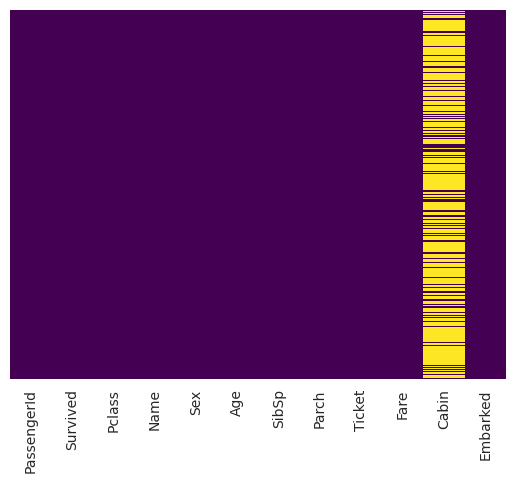

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

This heatmap visualizes missing values after imputation. Age no longer has missing values, while Cabin still contains many nulls and may need to be dropped or handled separately.

#### B. Handeling missing values of Cabin column by droping since:

- Cabin has too many missing values
- Keeping it would add noise


In [21]:
train.drop('Cabin', axis=1, inplace=True)

- axis=1 → drop a column
- inplace=True → modify the dataset directly
- Result: Cabin is completely removed



In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### C. Drop remaining missing rows

- It removes all rows that contain at least one missing value (NaN) from the DataFrame train.


In [23]:
train.dropna(inplace=True)

In [24]:
train.isnull().sum().sum()

np.int64(0)

##### summary: 
- We removed the Cabin column due to excessive missing values and dropped the remaining rows with missing Embarked values to ensure a fully clean dataset before modeling.”

## Engineer features

### Preparing categorical data for machine learning.

- Machine learning models cannot work with text (object) columns like bellow and they only understand numbers.


    - Embarked
    - Name
    - Ticket
    - Sex


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 69.5+ KB


- Dataset size: 889 rows
- Columns: 11
- Data types:
    - int64, float64 → ✅ OK for ML
    - object → ❌ must be converted
      - Object (categorical) columns here:
      - Name
      - Sex
      - Ticket
      - Embarked


#### Solution: We convert categorical columns into **dummy (one-hot) variables**.

- Example:
    - Sex → Sex_male, Sex_female
    - Embarked → Embarked_C, Embarked_Q, Embarked_S
    - Each becomes 0 or 1, which ML models can use.


In [26]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


- We Drop the First Dummy Variable by 'drop_first=True'

    - Dropping one dummy variable does not remove information from the dataset.
    - When a categorical variable has k categories, only k−1 dummy variables are needed.
    - The dropped category becomes the reference (baseline) category.
    - If all k dummy variables are kept, they become perfectly correlated (dummy variable trap).
    - This multicollinearity can cause unstable or unreliable model coefficients, especially in Logistic Regression.
    - Using drop_first=True prevents this issue while keeping the full information content of the feature.

##### Summary:
- We used one-hot encoding with drop_first=True to convert categorical variables into numeric form while avoiding multicollinearity.

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

- Results:
    - Sex → one column (usually male; female becomes the baseline)
    - Embarked → two columns (Q, S; C is baseline)
    - At this point, the dummy variables are created but NOT yet added to train.


- After this step, the dataset only contains numeric features.

- Machine learning models require numerical or well-defined categorical features

- Name and Ticket do not provide direct predictive value in raw form

- Keeping them can increase noise and model complexity without improving performance

In [28]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

We must add the dummy variables back to train. Without this, Sex and Embarked information is lost.

In [29]:
train = pd.concat([train, sex, embark], axis=1)

##### Summary:

We converted categorical variables using one-hot encoding, dropped the original text columns, and prepared a fully numeric dataset suitable for machine learning. Now our data is ready for the ML model. 

## Building the Logistic Regression Model

- Let’s start by splitting our data into a training set and a test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

- Before training the model, we separate the dataset into features (X) and the target variable (y).

    - The target variable is Survived, which represents whether a passenger survived (1) or not (0).
    - All other columns are used as input features for the model.

In [30]:
train.drop('Survived', axis=1)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.00000,1,0,7.2500,True,False,True
1,2,1,38.00000,1,0,71.2833,False,False,False
2,3,3,26.00000,0,0,7.9250,False,False,True
3,4,1,35.00000,1,0,53.1000,False,False,True
4,5,3,35.00000,0,0,8.0500,True,False,True
...,...,...,...,...,...,...,...,...,...
886,887,2,27.00000,0,0,13.0000,True,False,True
887,888,1,19.00000,0,0,30.0000,False,False,True
888,889,3,25.14062,1,2,23.4500,False,False,True
889,890,1,26.00000,0,0,30.0000,True,False,False


##### Feature Matrix (X)
- Removes the Survived column from the dataset

- Keeps only the explanatory variables (e.g., Pclass, Age, SibSp, Parch, Fare)

- These features are used by the model to learn survival patterns

##### Target Vector (y)

In [31]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

- Extracts the target label

- Contains the outcome the model is trying to predict

- Why This Step Is Important:

    - Machine learning models require a clear separation between inputs (X) and outputs (y)

    - This structure is necessary before performing a train–test split

    - It ensures the model does not accidentally learn from the target variable itself (data leakage)

- Machine learning models:
    - Learn patterns from X
    - Try to predict y
    - Must never see y inside X (data leakage)

- Imports a utility that splits data into training and testing sets

%conda install scikit-learn

In [34]:
from sklearn.model_selection import train_test_split

- Split the data into training set (learn) and test set (evaluate)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    train.drop('Survived', axis=1),
    train['Survived'],
    test_size=0.30,
    random_state=101)

- train.drop('Survived', axis=1) --> Features (X) – all inputs
- train['Survived'] --> Target (y) – what we predict
- test_size=0.30 --> 30% test, 70% training
- random_state=101 --> Makes results reproducible



- X_train --> Training features
- X_test --> Test features
- y_train --> Training labels
- y_test --> Test labels

- Why this is important:
    - Model learns from X_train, y_train
    - Model is evaluated on unseen data (X_test)
    - Prevents overfitting
    - Simulates real-world prediction

##### Summary: 
- I used train_test_split to divide the dataset into training and testing sets so the model can be trained and evaluated on unseen data.

## Training and Prediction
### Logestic Regression
##### Importing Logestic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

- Imports Logistic Regression is a classification algorithm
- It used for binary outcomes (here: survived vs not survived)

##### Create and train the model

In [42]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

- Logistic Regression uses an iterative optimization algorithm (LBFGS)

- The model did not fully converge within the default limit of 100 iterations

- This is a warning, not an error — the model still trained

- Common reasons:

    - Features are on very different scales (e.g. Age vs Fare)

    - The dataset needs more iterations

    - Logistic Regression is sensitive to unscaled data

- logmodel → the model object

- .fit() → learns patterns from training data

- Uses X_train (features) and y_train (labels)


##### After this, the model is trained


##### Make predictions


In [43]:
predictions = logmodel.predict(X_test)

- Uses the trained model
- Predicts survival (0 or 1) for unseen test data

#### Confusion Matrix
- Tool to evaluate classification performance

In [45]:
from sklearn.metrics import confusion_matrix

- Create confusion matrix

In [46]:
accuracy = confusion_matrix(y_test, predictions)
accuracy


array([[148,  15],
       [ 38,  66]], dtype=int64)

How to read the confusion matrix

[[TN, FP],
 
 [FN, TP]]

- 148 --> True Negatives (correctly predicted not survived)
- 15 --> False Positives (predicted survived, actually didn’t)
- 38 --> False Negatives (missed survivors)
- 66 --> True Positives (correctly predicted survived)

##### Key insight:
- Model is better at predicting non-survivors
- Misses some survivors (higher FN)
- Accuracy alone is not enough → need precision/recall


##### Summary:
- I trained a Logistic Regression model, made predictions on test data, and evaluated performance using a confusion matrix.

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8014981273408239

- y_test → the real answers (true labels)

- predictions → the model’s guesses


- accuracy_score() → checks how many guesses were correct


##### Summary:
I evaluated the model using accuracy score, which showed around 72% correct predictions on the test data.